In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


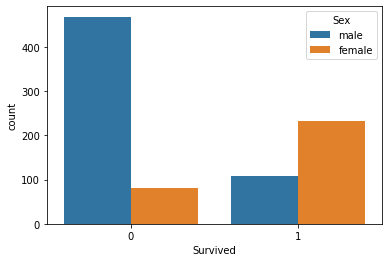

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train)

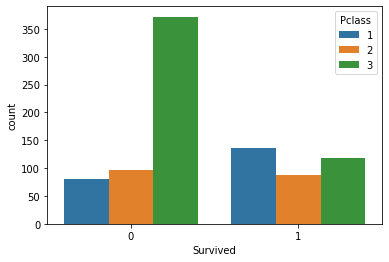

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)

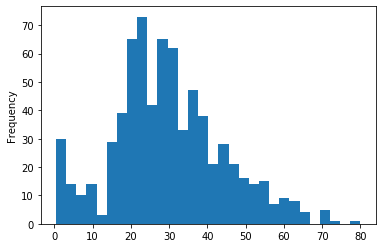

In [11]:
train['Age'].plot.hist(bins=30)

In [51]:
#cleanig of data

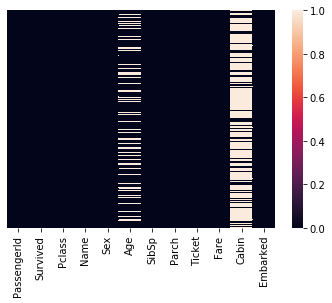

In [14]:
sns.heatmap(train.isnull(),yticklabels=False)
#here cabin is misssing most data and age is also missing some data

In [28]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass']==1].mean()['Age']

        elif Pclass == 2:
            return train[train['Pclass']==2].mean()['Age']

        else:
            return train[train['Pclass']==3].mean()['Age']

    else:
        return Age
    

In [30]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

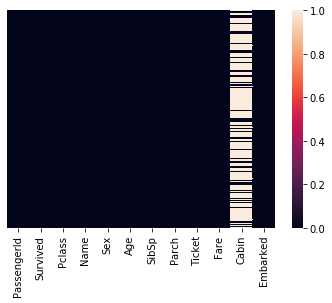

In [32]:
sns.heatmap(train.isnull(),yticklabels=False)

In [33]:
train.drop('Cabin',axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
train.dropna(inplace=True)

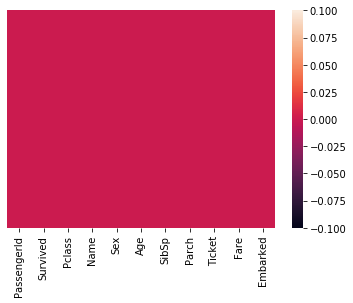

In [36]:
sns.heatmap(train.isnull(),yticklabels=False)
#data is fully  clean

In [41]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
emb=pd.get_dummies(train['Embarked'],drop_first=True)
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [63]:
train=pd.concat([train,sex,emb],axis=1)

In [64]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [61]:
train.drop(['Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace=True).head(3)

In [52]:
#prediction

In [65]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [67]:
x=train[[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]

In [68]:
y=train['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel=LogisticRegression()

In [74]:
logmodel.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions=logmodel.predict(x_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)